# **Nama : Erika Dwi Puspitasari**
# **NIM : 082111633010**
# **Kelas : AVD PRAK - I3**

[Data Housing Boston Kaggle](https://www.kaggle.com/datasets/altavish/boston-housing-dataset)

In [10]:
import pandas as pd


# **Membaca Dataset**

### Data Perumahan : Informasi yang dikumpulkan oleh Layanan Sensus AS mengenai perumahan di wilayah Boston MA.

In [11]:
# membaca data

data = pd.read_csv('HousingData.csv')
df = pd.DataFrame(data)
print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

Keterangan :

-	CRIM : Tingkat kejahatan per kapita menurut kota
-	ZN : Proporsi lahan perumahan yang dikategorikan untuk lahan seluas lebih dari 25.000 kaki persegi.
-	INDUS : Rasio Luas Lahan
-	CHAS : Variabel dummy Sungai Charles (1 jika saluran membatasi sungai; 0 jika tidak)
-	NOX : Konsentrasi oksida nitrat (bagian per 10 juta)
-	RM : Jumlah rata-rata kamar per rumah
-	AGE : Proporsi rumah yang dibangun sebelum tahun 1940
-	DIS : Jarak ke pusat kerja Boston
-	RAD : Indeks aksesibilitas ke jalan raya
-	TAX : Tarif pajak properti nilai penuh per $10.000
-	PTRATIO : Rasio murid-guru menurut kota
-	B : 1000(Bk - 0.63)^2 rasio murid-guru menurut kota
-	LSTAT : % penduduk berstatus rendah
-	MEDV : Harga rumah



# **Mengecek Outlier**

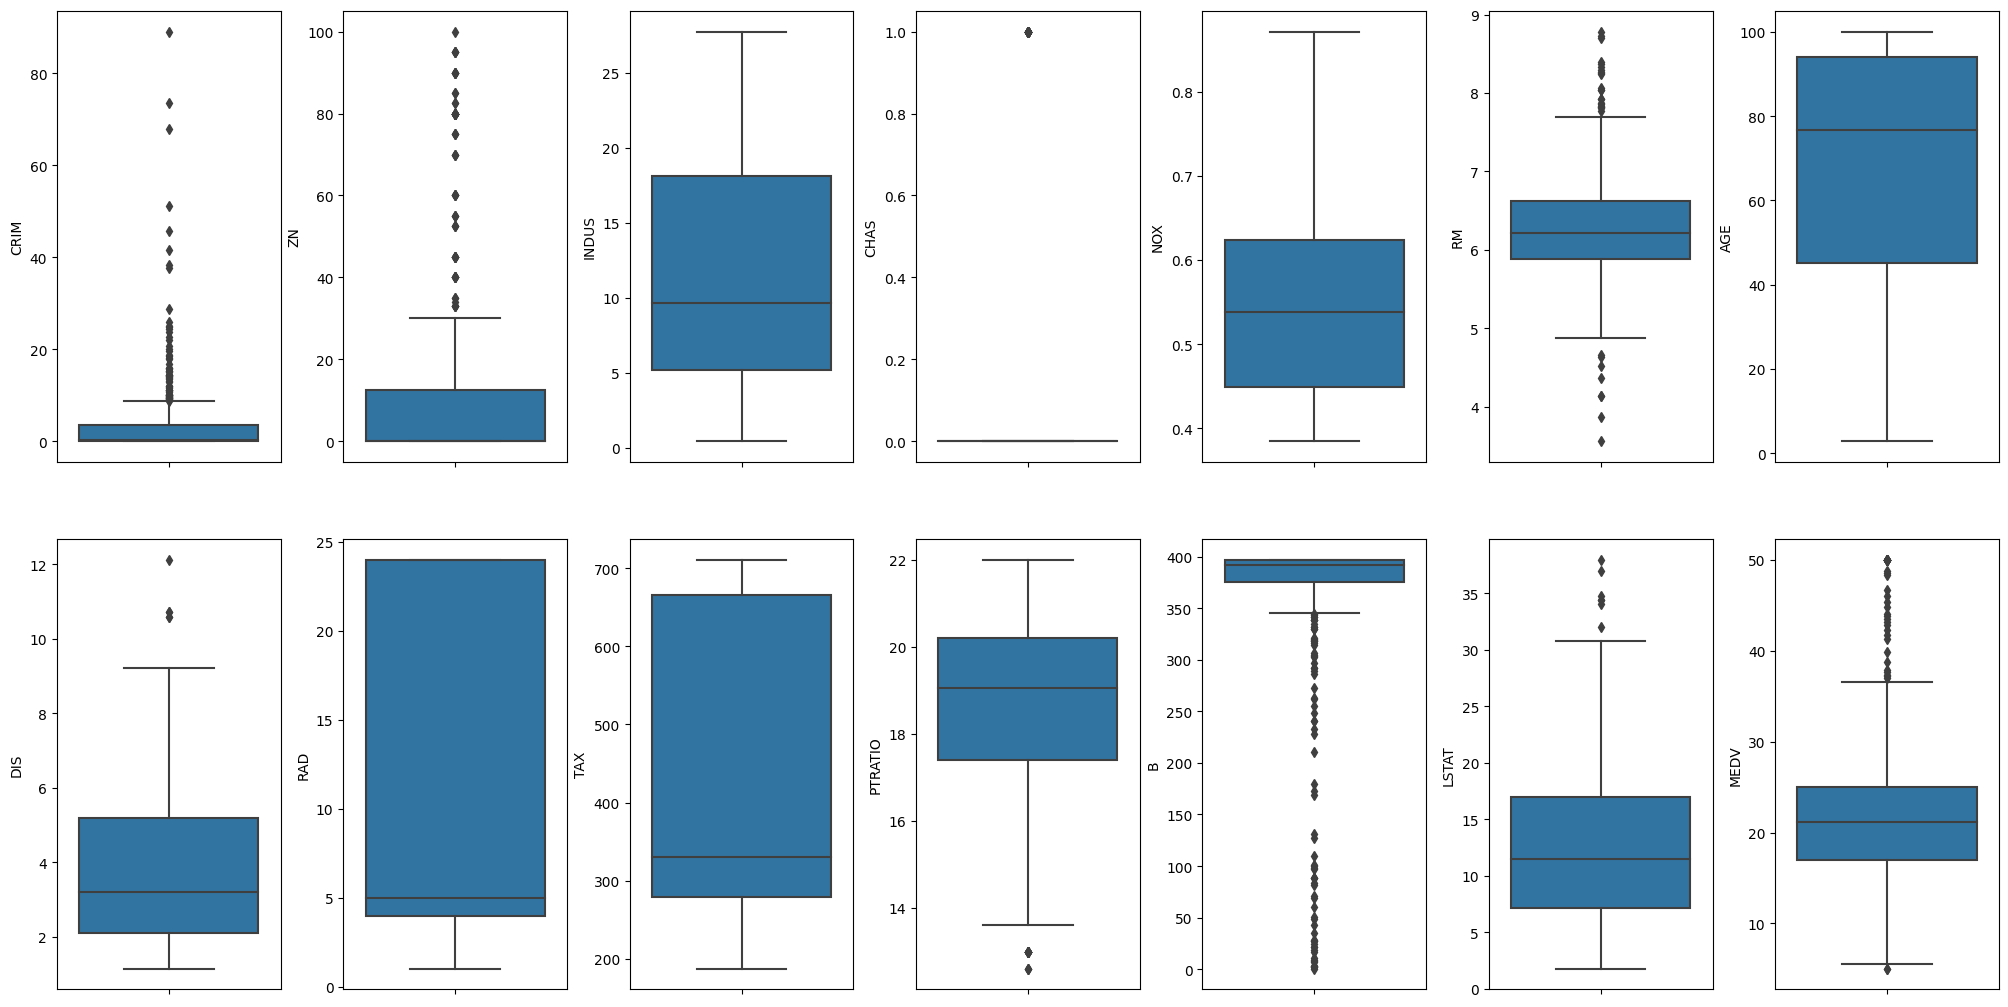

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Outlier terjadi ketika terdapat data yang terletak di atas atau di bawah garis. Dari hasil di atas, terlihat bahwa kolom CRIM, ZN, RM, DIS, PTRATIO, B, LSTAT, dan MEDV memiliki outlier. Untuk kolom CHAS hampir semua datanya berisi nilai 0 sehingga tampilan boxplot nya tampak demikian.

### **Menampilkan Persentase Outlier**

In [13]:
#Menampilkan persentasi outlier setiap kolom

import numpy as np

for k, v in data.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 12.85%
Column ZN outliers = 12.45%
Column INDUS outliers = 0.00%
Column CHAS outliers = 96.05%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


Kolom B memiliki persentase outlier tertinggi. Kolom CHAS memiliki persentase 96.05% karena diperngaruhi oleh hampir semua datanya yang berisi nilai 0  

# **Menentukan Distribusi dengan Histogram**

<ipython-input-14-0f4921999283>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
<ipython-input-14-0f4921999283>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
<ipython-input-14-0f4921999283>:6: UserWarning: 

`distplot` is a deprecated function and will be 

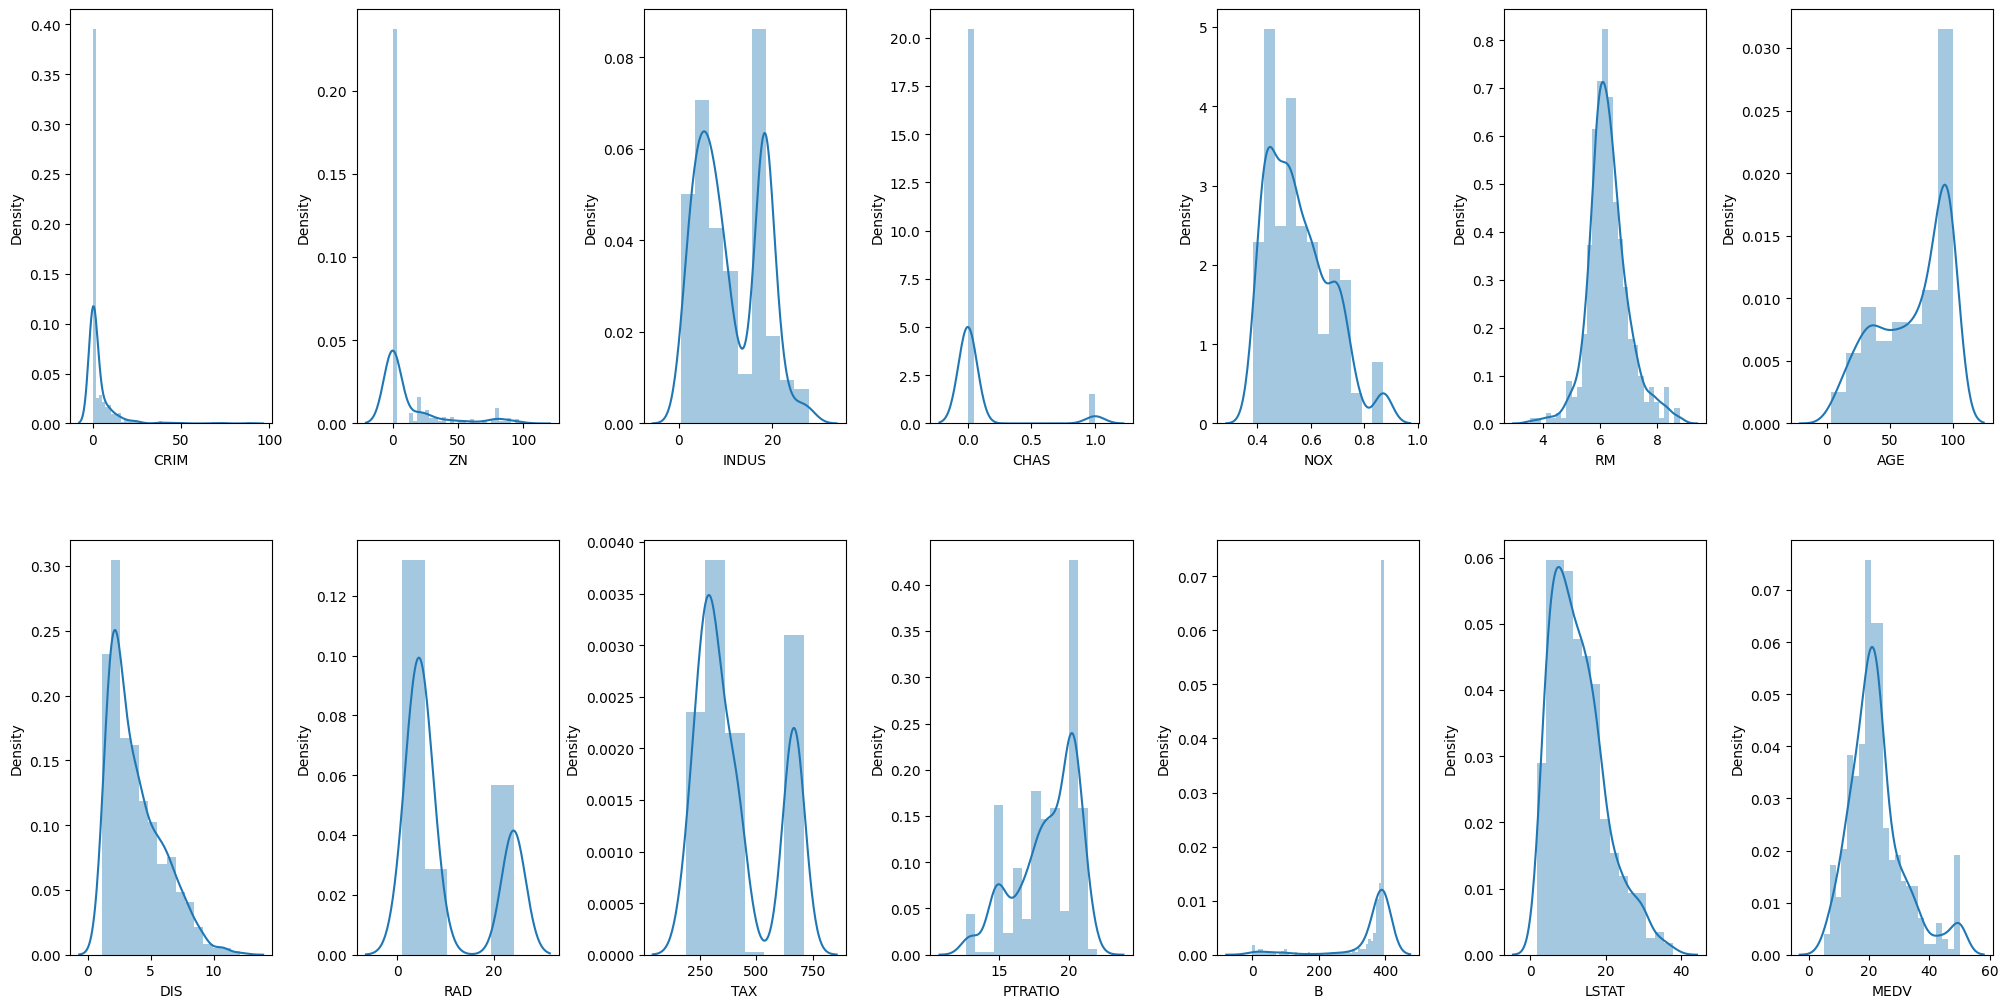

In [14]:
# Visualisasikan distribusi dengan berbagai histogram
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Histogram menunjukkan bahwa kolom CRIM, ZN, NOX, DIS memiliki distribusi positif (positively skewed). Kolom AGE, PTRATIO, B LSTAT memiliki distribusi negatif (negatively skewed). Sedangkan kolom INDUS, RM, RAD, TAX, MEDV terlihat memiliki distribusi normal (prediksi) kecuali kolom CHAS yang merupakan variabel diskrit.

# **Korelasi antar variabel dengan variabel output (MEDV) dengan Scatterplot dan Heatmap**

<Axes: >

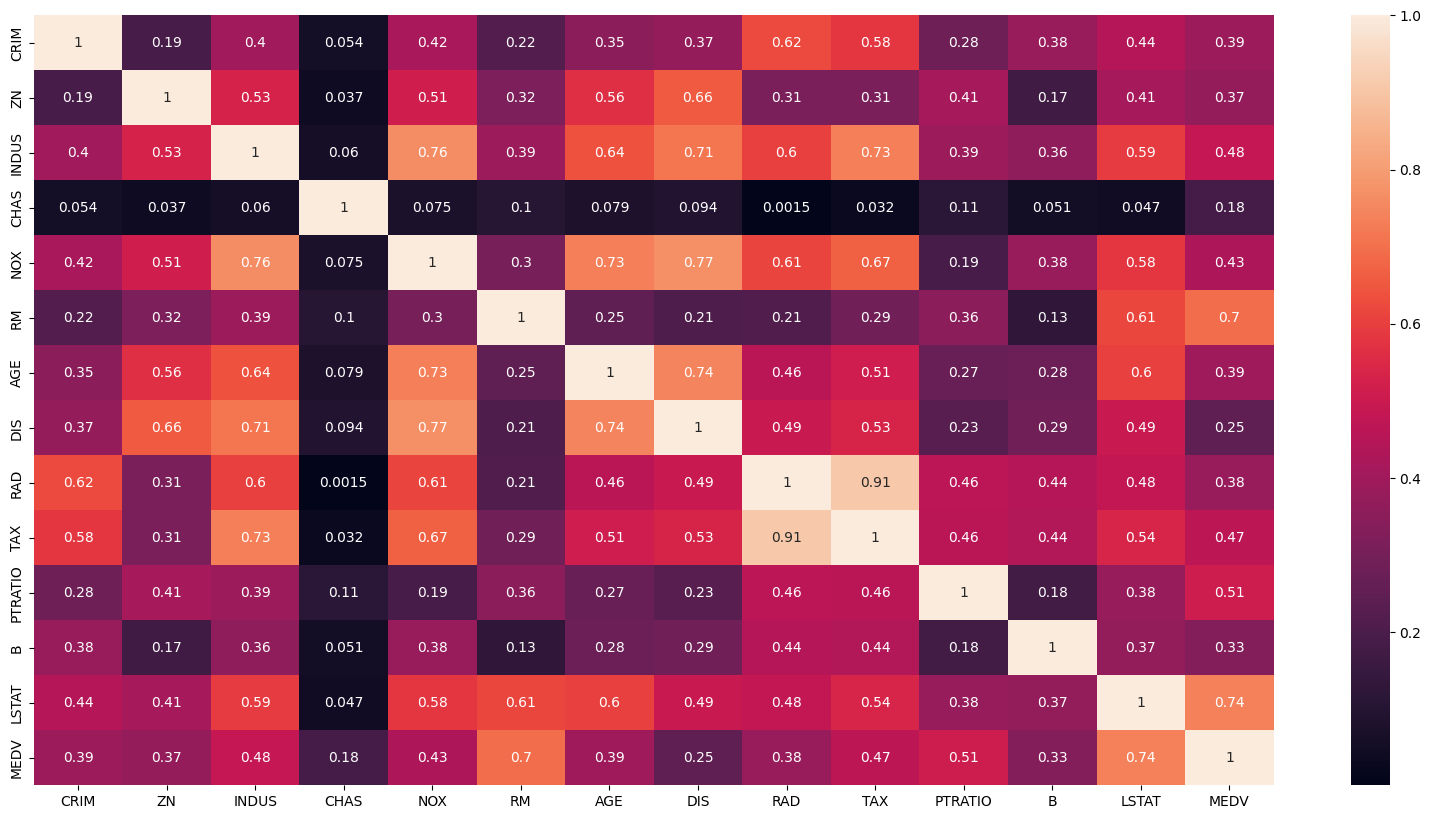

In [15]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

Dari matriks korelasi (heatmap), terlihat bahwa TAX dan RAD merupakan fitur yang sangat berkorelasi (0.91). Kolom LSTAT, RM, dan PTRAIO mempunyai skor korelasi diatas 0.5 dengan MEDV yang merupakan indikasi baik untuk digunakan sebagai predictor dalam memprediksi harga rumah.

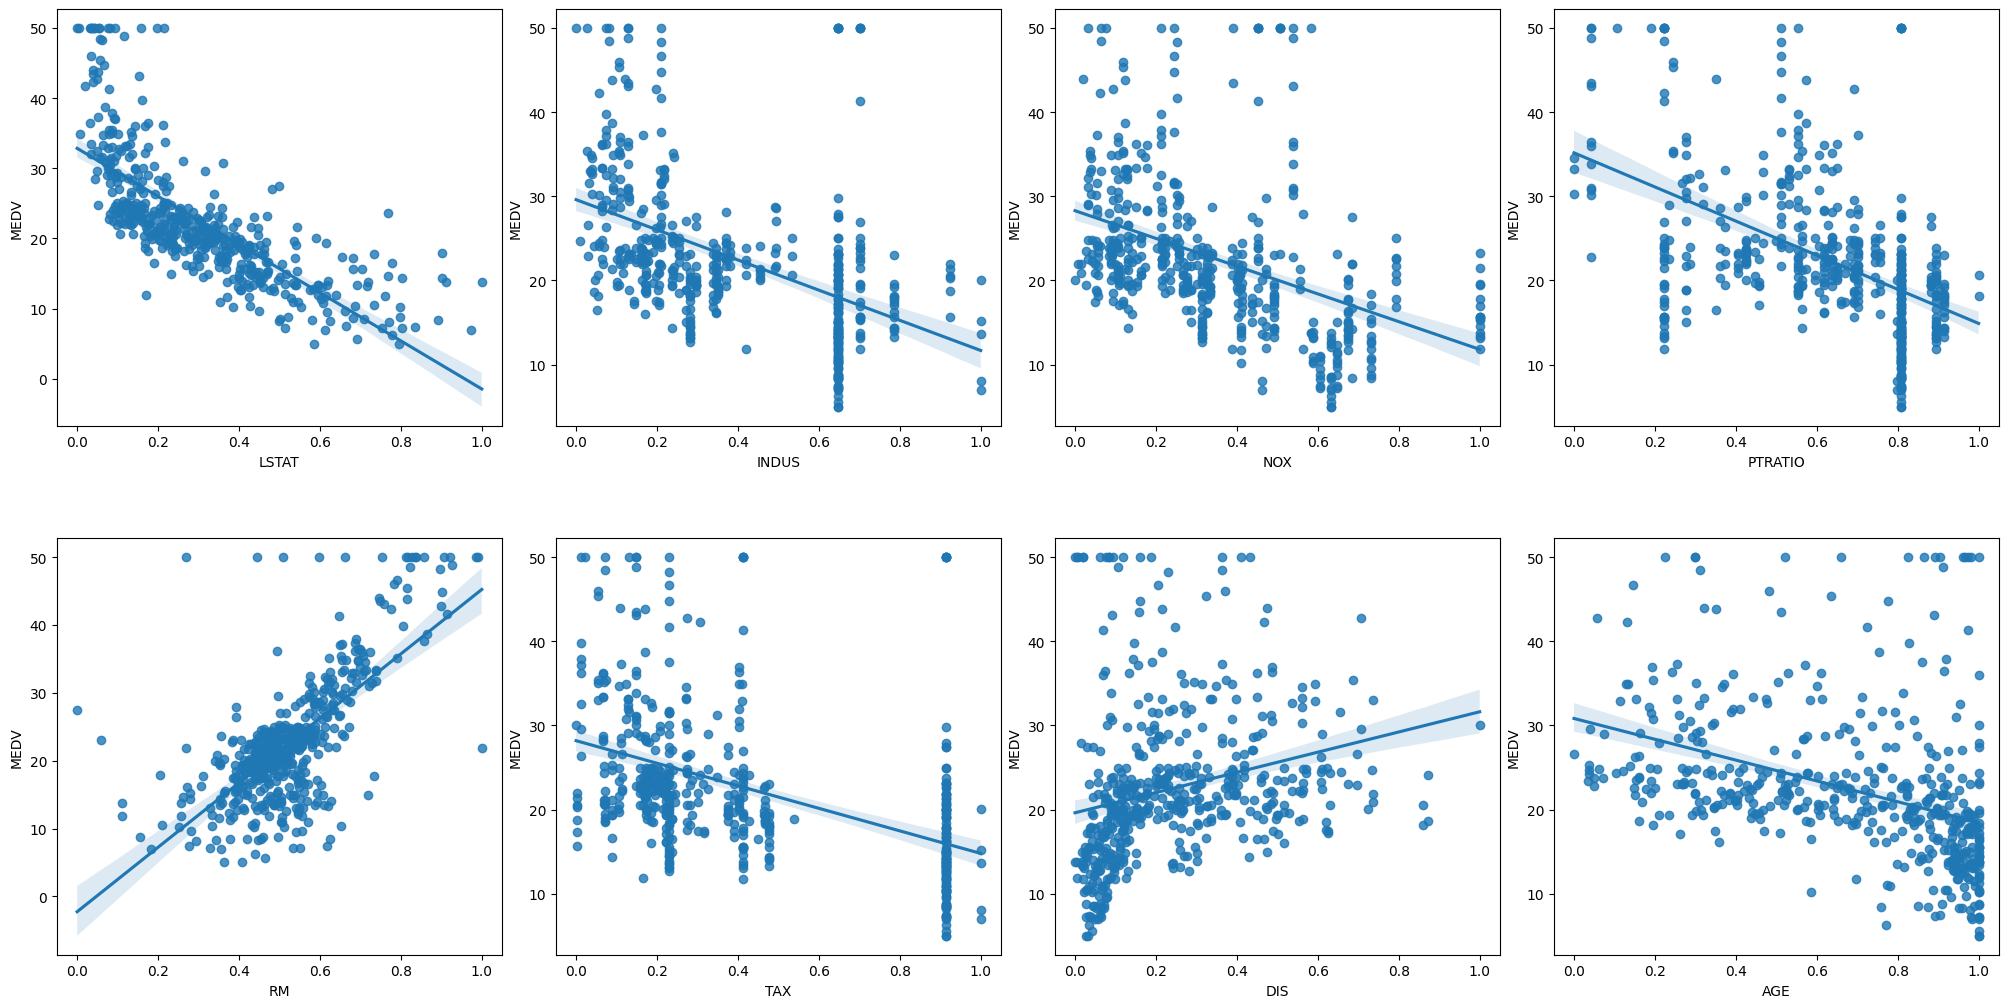

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Dari hasil scatter plot, terlihat bahwa :
-	Kolom RM (Jumlah rata-rata kamar per rumah) dan DIS (Jarak ke pusat kerja Boston) memiliki korelasi yang positif dengan MEDV (Harga rumah). Ini bisa diartikan bahwa rumah-rumah dengan lebih banyak kamar biasanya lebih mahal dan semakin dekat rumah-rumah dengan pusat, maka kerja cenderung memiliki harga yang lebih tinggi.
-	Kolom LSTAT (% penduduk berstatus rendah), INDUS (Rasio Luas Lahan Industri), NOX (Konsentrasi Nitrogen Oksida), PTRATIO (Rasio Murid-Guru), TAX (Tarif Pajak Properti), dan AGE (Proporsi rumah yang dibangun sebelum tahun 1940) memiliki korelasi yang negatif dengan MEDV (Harga rumah). Ini bisa diartikan bahwa :

1)	Daerah-daerah dengan tingkat sosial-ekonomi yang lebih rendah mungkin memiliki harga rumah yang lebih terjangkau

2)	Daerah-daerah dengan lebih banyak lahan industri, harga rumah cenderung lebih rendah. Kehadiran industri yang besar mungkin memiliki dampak negatif pada nilai properti di daerah.

3)	Daerah-daerah dengan polusi udara yang lebih tinggi (diukur dengan konsentrasi NOX) mungkin memiliki harga rumah yang lebih rendah karena faktor lingkungan yang kurang sehat

4)	Daerah dengan rasio murid-guru yang lebih tinggi mungkin memiliki harga rumah yang lebih rendah karena perhatian yang lebih sedikit yang dapat diberikan kepada setiap murid.

5)	Daerah-daerah dengan pajak properti yang lebih tinggi mungkin memiliki harga rumah yang lebih rendah karena beban pajak yang lebih besar pada pemilik property
6)	Rumah-rumah yang lebih tua mungkin memiliki harga yang lebih rendah karena mungkin memerlukan pemeliharaan atau renovasi tambahan
